In [2]:
pip install torch torchvision torchaudio matplotlib scikit-learn

INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   --------------------- ------------------ 1.3/2.4 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os
from PIL import Image

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DenseNet-121
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 10)  # Temporary 10 classes for clustering
model = model.to(device)

print("✅ Model loaded & moved to", device)

c:\Users\tashi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tashi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Model loaded & moved to cpu


In [1]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet mean & std
])

# Custom Dataset
class DICOMDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".png")]
        self.transform = transform
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_path  # No labels yet

# Load dataset
image_folder = "D:/Semester notes/Semester 8/capstone project/processed_images"
dataset = DICOMDataset(image_folder, transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

print(f"✅ Loaded {len(dataset)} images")

NameError: name 'transforms' is not defined

In [9]:
pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to c:\users\tashi\appdata\local\temp\pip-req-build-9t_0mw0z
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369613 sha256=59e23b9f0923ccb3628d4f210de93e6b49217db208b760fc131002773ff33877
  Stored in directory: C:\Users\tashi\AppData\Local\Temp\pip-ephem-wheel-cache-u_mbw520\wheels\c8\e4\e1\11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\tashi\AppData\Local\Temp\pip-req-build-9t_0mw0z'

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import torch
import clip
from PIL import Image
import numpy as np

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load and preprocess images
image_folder = "./processed_images"
sample_images = ["01-001.png", "01-002.png", "01-003.png", "01-004.png", "01-005.png",
                 "01-006.png", "01-007.png", "01-008.png", "01-009.png", "01-010.png"]

image_tensors = torch.stack([preprocess(Image.open(f"{image_folder}/{img}")) for img in sample_images]).to(device)

# Sample text descriptions
text_descriptions = [
    "Lung adenocarcinoma with lepidic growth pattern",
    "Squamous cell carcinoma with keratinization",
    "Solid growth of poorly differentiated carcinoma",
    "Necrotic tumor with inflammatory infiltrates",
    "Papillary adenocarcinoma with fibrovascular cores",
    "Mucinous carcinoma with extracellular mucin",
    "Lymphovascular invasion by malignant cells",
    "Small cell carcinoma with nuclear molding",
    "Pleomorphic tumor with giant cells",
    "Metastatic carcinoma with glandular differentiation"
]

# Encode images and text
with torch.no_grad():
    image_features = model.encode_image(image_tensors)
    text_tokens = clip.tokenize(text_descriptions).to(device)
    text_features = model.encode_text(text_tokens)

# Normalize features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute similarity matrix
similarity_matrix = (100.0 * image_features @ text_features.T).cpu().numpy()

# Print results
print("\n🔍 Image-Text Similarity Matrix:")
print(similarity.cpu().numpy())


🔍 Image-Text Similarity Matrix:
[[25.947777 24.96586  25.968172 25.37006  26.87226  27.849184 28.025684
  27.491005 26.252293 26.759407]
 [26.148054 25.268991 26.11605  25.439026 26.984493 27.809406 27.915092
  27.457676 26.523022 26.914951]
 [26.363735 25.35983  26.14915  25.740765 27.006634 28.10499  28.100574
  27.599907 26.66525  27.170664]
 [25.53722  25.182117 25.14199  24.973186 26.155312 27.424652 27.122059
  26.952545 26.296562 26.610252]
 [25.620638 25.096552 25.243002 24.84192  26.143126 27.490805 27.124535
  27.531307 25.97089  26.688202]
 [25.542877 24.734459 25.386068 25.067062 26.452484 27.736816 27.71437
  27.47766  25.651667 26.388788]
 [25.309103 24.522871 25.258755 24.608955 26.256187 27.25608  27.541367
  27.258135 25.17673  25.843864]
 [25.80935  24.91162  25.655258 24.916412 26.625137 27.532413 27.768555
  27.46914  25.787214 26.273792]
 [25.911905 25.196331 25.569695 25.001907 26.465836 27.62093  27.599483
  27.6646   25.900421 26.395452]
 [27.688494 23.243372 2

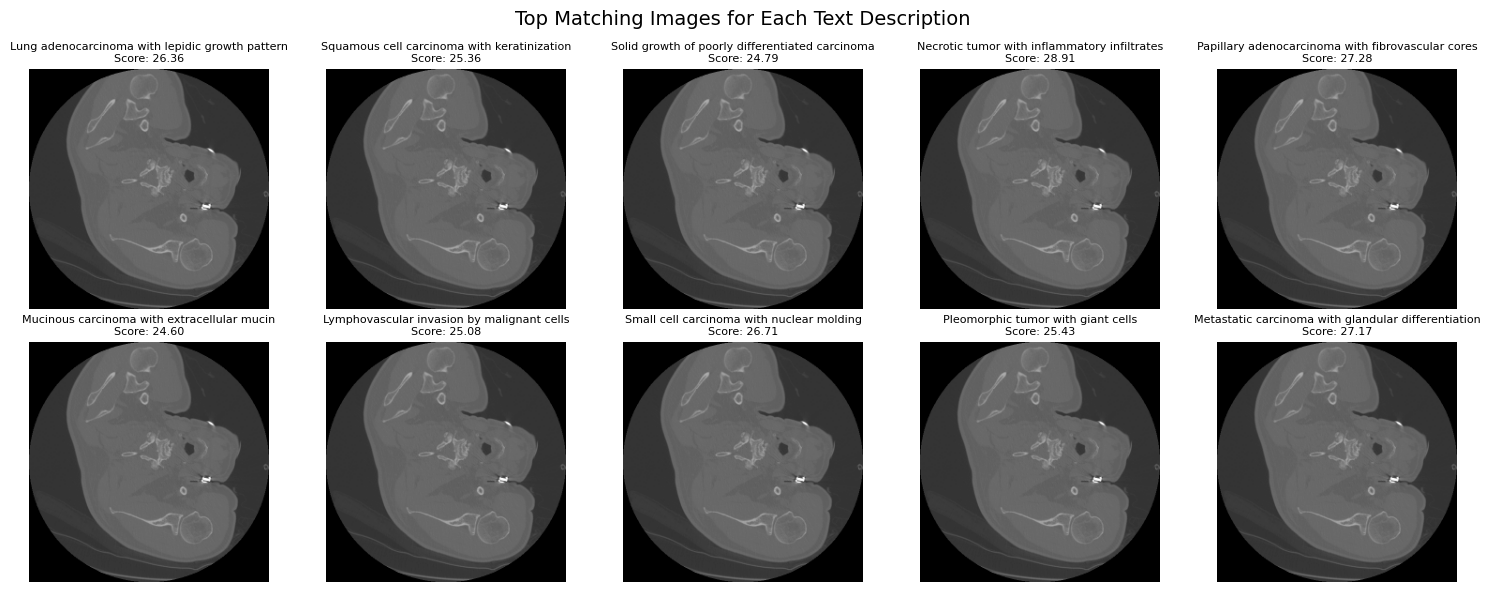

In [11]:
import matplotlib.pyplot as plt

# Get top matches for each text
top_matches = np.argmax(similarity_matrix, axis=0)

# Plot results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Top Matching Images for Each Text Description", fontsize=14)

for i, ax in enumerate(axes.flat):
    img_path = f"{image_folder}/{sample_images[top_matches[i]]}"
    img = Image.open(img_path)
    
    ax.imshow(img)
    ax.set_title(f"{text_descriptions[i]}\nScore: {similarity_matrix[top_matches[i], i]:.2f}", fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()